# Analysis of VIO initialization methods with DROID SLAM trajectories on EUROC datasets
__Goals__:

1. Compare the estimated parameters with groundtruth parameters given in the `<project_folder>/data/<sequence_name>/state_groundtruth_estimate/data.csv`

2. Refer : *An Analytical Solution to the IMU Initialization Problem for Visual-Inertial Systems*

3. Compare the solutions of stereo and mono for droid slam trajectories to showcase the stability of algorithms for parameters:
    b_a_x, b_a_y, b_a_z, g_x, g_y, g_z

4. Perturb the trajectory by small amounts of noise and check the robustness of algorithms by plotting the distribution of estimated parameters. 

5. Plot of optimal time to initialize based on error vs number of keyframes (time plotted), 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd


In [33]:
dir_name = Path(f"/home/{os.environ['USER']}/workspaces/NEUFR/vins/vio_initialization/exp2_results")
print(f'Main directory path set right: {dir_name.exists()}')
sequences =   ['MH_01_easy', 'MH_02_easy', 'MH_03_medium', 
               'MH_04_difficult', 'MH_05_difficult', 'V1_01_easy', 
               'V1_02_medium', 'V1_03_difficult', 'V2_01_easy', 
               'V2_02_medium','V2_03_difficult']
mono_result_folders =[]
stereo_result_folders = []

for s in sequences:
    mono_result_folders.append(dir_name.joinpath(s, "mono"))
    stereo_result_folders.append(dir_name.joinpath(s, "stereo"))

# check if path exists

for i in range(0, len(mono_result_folders)):
    if not mono_result_folders[i].exists():
        print(f'Path {mono_result_folders[i]} - exist - {mono_result_folders[i].exists()}')

Main directory path set right: True


# Mono analysis

In [34]:
filenamePrefixes = ['DroidKeyFrameTrajectoryMono', 'DroidKeyFrameTrajectoryStereo']
methods = ['proposed', 'proposed_wo_prior','iterative', 'iterative_wo_prior', 'mqh']

i = 0
filepaths = sorted(mono_result_folders[i].glob("DroidKeyFrameTrajectory*.csv"))
print(f'files = \n')
print(*filepaths, sep='\n')

files = 

/home/jagatpreet/workspaces/NEUFR/vins/vio_initialization/exp2_results/MH_01_easy/mono/DroidKeyFrameTrajectoryMono_iterative_cam5.csv
/home/jagatpreet/workspaces/NEUFR/vins/vio_initialization/exp2_results/MH_01_easy/mono/DroidKeyFrameTrajectoryMono_iterative_wo_prior_cam5.csv
/home/jagatpreet/workspaces/NEUFR/vins/vio_initialization/exp2_results/MH_01_easy/mono/DroidKeyFrameTrajectoryMono_mqh_camera5.csv
/home/jagatpreet/workspaces/NEUFR/vins/vio_initialization/exp2_results/MH_01_easy/mono/DroidKeyFrameTrajectoryMono_proposed_cam5.csv
/home/jagatpreet/workspaces/NEUFR/vins/vio_initialization/exp2_results/MH_01_easy/mono/DroidKeyFrameTrajectoryMono_proposed_wo_prior_cam5.csv


In [35]:
data = pd.read_csv(filepaths[0], delimiter=",", header=0)
print(data.head())


   # index   flag   s_computed   s_true     b_g_x     b_g_y     b_g_z  \
0      0.0    1.0     0.714003   0.6928 -0.003899  0.024118  0.077188   
1      1.0    1.0     0.760063   0.6928 -0.003159  0.021426  0.081591   
2      2.0    1.0     0.713566   0.6928 -0.002158  0.020468  0.080129   
3      3.0    1.0     0.764305   0.6928 -0.004780  0.025381  0.076554   
4      4.0    1.0     0.706940   0.6928 -0.002592  0.017904  0.083245   

      b_a_x     b_a_y     b_a_z       g_x       g_y      g_z   
0 -0.000036  0.000002  0.000013  0.167748  9.349631  2.965193  
1  0.000018 -0.000000 -0.000007  0.243423  9.340828  2.987605  
2 -0.000018  0.000000  0.000006  0.187740  9.346820  2.972846  
3 -0.000024 -0.000000  0.000007  0.230259  9.333620  3.011083  
4 -0.000015  0.000000  0.000005  0.194940  9.350457  2.960922  


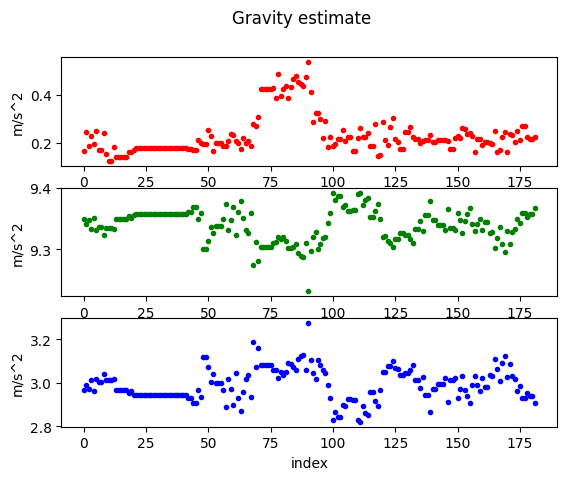

In [36]:
fig1, ax1 = plt.subplots(nrows=3)
clrs = ['r', 'g', 'b']
col_names = ["g_x", "g_y", "g_z"]
for i, ax in enumerate(ax1):
    ax.plot(data.iloc[:, 10 + i], f'.{clrs[i]}')
    ax.set_xlabel("index")
    ax.set_ylabel("m/s^2")
fig1.suptitle("Gravity estimate")
plt.show()

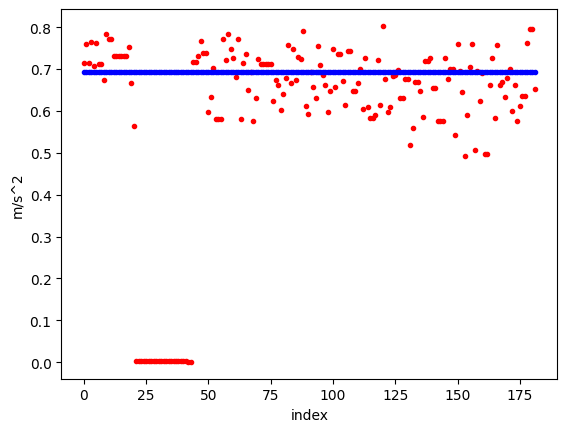

In [37]:
fig, ax = plt.subplots(nrows=1)
ax.plot(data[' s_computed'], f'.r')
ax.plot(data[' s_true'], f'.b')
ax.set_xlabel("index")
ax.set_ylabel("m/s^2")
fig1.suptitle("Scale estimate")
plt.show()

# Stereo analysis


In [38]:
i = 0
filepaths = sorted(stereo_result_folders[i].glob("DroidKeyFrameTrajectory*.csv"))
print(f'files = \n')
print(*filepaths, sep='\n')

files = 

/home/jagatpreet/workspaces/NEUFR/vins/vio_initialization/exp2_results/MH_01_easy/stereo/DroidKeyFrameTrajectoryStereo_iterative_cam5.csv
/home/jagatpreet/workspaces/NEUFR/vins/vio_initialization/exp2_results/MH_01_easy/stereo/DroidKeyFrameTrajectoryStereo_iterative_wo_prior_cam5.csv
/home/jagatpreet/workspaces/NEUFR/vins/vio_initialization/exp2_results/MH_01_easy/stereo/DroidKeyFrameTrajectoryStereo_mqh_camera5.csv
/home/jagatpreet/workspaces/NEUFR/vins/vio_initialization/exp2_results/MH_01_easy/stereo/DroidKeyFrameTrajectoryStereo_proposed_cam5.csv
/home/jagatpreet/workspaces/NEUFR/vins/vio_initialization/exp2_results/MH_01_easy/stereo/DroidKeyFrameTrajectoryStereo_proposed_wo_prior_cam5.csv


In [39]:
data = pd.read_csv(filepaths[0], delimiter=",", header=0)
print(data.head())

   # index   flag   s_computed    s_true     b_g_x     b_g_y     b_g_z  \
0      0.0    1.0     0.989254  1.025517 -0.003557  0.020926  0.077862   
1      1.0    1.0     1.050966  1.025517 -0.003528  0.023197  0.081086   
2      2.0    1.0     0.991485  1.025517 -0.002347  0.021896  0.079490   
3      3.0    1.0     1.056045  1.025517 -0.004662  0.022181  0.077636   
4      4.0    1.0     0.982974  1.025517 -0.003083  0.020735  0.081629   

      b_a_x     b_a_y     b_a_z       g_x       g_y      g_z   
0 -0.000040  0.000002  0.000015  0.176944  9.336583  3.005497  
1  0.000010 -0.000000 -0.000004  0.234930  9.340671  2.988774  
2 -0.000024  0.000000  0.000009  0.191430  9.335407  3.008262  
3 -0.000033 -0.000001  0.000010  0.219646  9.334136  3.010275  
4 -0.000007 -0.000000  0.000002  0.201256  9.342037  2.986961  


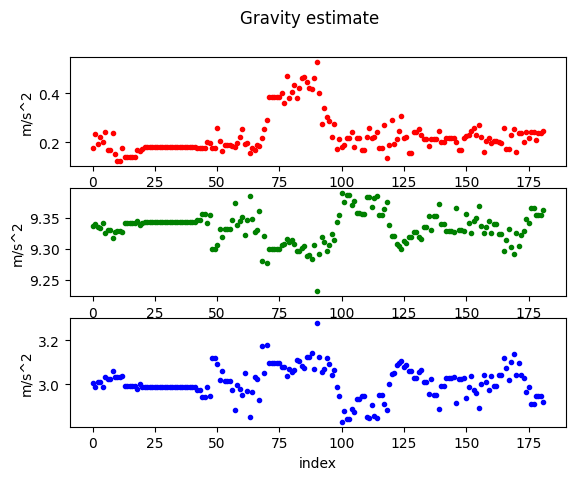

In [40]:
fig1, ax1 = plt.subplots(nrows=3)
clrs = ['r', 'g', 'b']
col_names = ["g_x", "g_y", "g_z"]
for i, ax in enumerate(ax1):
    ax.plot(data.iloc[:, 10 + i], f'.{clrs[i]}')
    ax.set_xlabel("index")
    ax.set_ylabel("m/s^2")
fig1.suptitle("Gravity estimate")
plt.show()

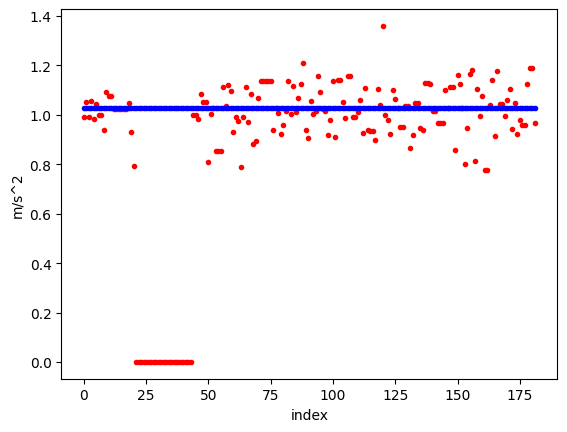

In [41]:
fig, ax = plt.subplots(nrows=1)
ax.plot(data[' s_computed'], f'.r')
ax.plot(data[' s_true'], f'.b')
ax.set_xlabel("index")
ax.set_ylabel("m/s^2")
fig1.suptitle("Scale estimate")
plt.show()